<div align="right">Revision 1 : September 2022</div>

<a href="https://colab.research.google.com/github/dewdotninja/robotics/blob/master/ME208583/y2022/hws/merobo22_hw2_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Department of Mechanical Engineering

### Homework 2
First Semester, Academic Year 2022

<br>**01208583  Robotics**

Type student name - surname and ID in the cell below.

In [ ]:
#John Doe  6010506258

#### Homework problems may depend on the last 3 digits of your student ID

-------xyz (other digits are ignored)

In case any digit in the last 3 are 0, it must be replaced by 5.

#### Examples
    
Student A's ID - 6010555853 results in x = 8, y = 5, z = 3

Student B 's ID - 6010546104 results in x = 1, y = 5, z = 4

Student C 's ID - 6310055032 results in x = 5, y = 3, z = 2
    
These valuess are used for all the problems in the exam where x,y,and/or z appear. In this 
sense, the results from each student should be different even computed using the same methods.

Operations that may be applied to the variables.

$+$ addition

 $-$  subtraction

 $*$  multiplication 

 $/$ division

$**$ raise to the power (For example, x**z means $x^z$)

including math opertions such as $\exp(x)$, $\sin(z*t)$

If a variable is embedded in some digit of a value without any operation symbol, 
just replace that digit. 
<br>For example,  z=8 y = 3 $\Rightarrow$ 12z7 = 1287, 4.3y5 = 4.335

Conditional statement may be used, such as
if x<5 do task A, otherwise do task B

<em>Example: </em> Let $R1 = 1000*x \,\Omega, C1 = 10*y \,\mu F$

<ul>
<li />Student A (x=8, y=5) does this problem with R1 = 8000 $\Omega$, C1 = 50 $\mu$F
<li />Student B (x=1, y=5) does this problem with R1 = 1000 $\Omega$, C1 = 50 $\mu$F
<li />Student C (x=5, y=3) does this problem with R1 = 5000 $\Omega$, C1 = 30 $\mu$F
</ul>


In [ ]:
# You need to install these libraries in the Colab environment
!pip install control

In [1]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [2]:
#Assume student ID 6010506258
id_x = 2
id_y = 5
id_z = 8

### P1 (10 points)

One device commonly used in industrial machines with rotary motion, such as robotic joints, is called a Harmonic Drive from a group of companies Harmonic Drive LLC. motor Hereafter, for the convenience of writing, it is abbreviated as the HDM system.

Figure 1 shows the structure of the HDM mechanism consisting of three parts: a circular spline, a flexspline, and an elliptical wave generator. The wave generator is connected to the shaft of a motor that rotates at high speed. A round ring has teeth inside. Between the two are separated by an elastic ring with teeth on the outside.

<p align="center">
<img src="https://drive.google.com/uc?id=1PtcGtTJ2iv81nLHz5Gb5mNnGeM_d5i4c" width=300 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 HDM structure (https://www.harmonicdrive.net/)</b></div>

When drawing a schematic diagram of the HDM device connected to the DC motor, it will be shown in Figure 2. Left side is the motor's electrical system. and on the right is the mechanical system of the harmonic drive, represented by a soft shaft thru-axle gearbox with a hardness of k.

<p align="center">
<img src="https://drive.google.com/uc?id=1OP3LsMAgsHQ5uYdmVLQFHQLq55J-kYd7" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 HDM block diagram </b></div>

Define
$$
p_l(s) = J_ls^2 + B_ls + k \tag{1}
$$
$$
p_m(s) = J_ms^2 + B_ms + k \tag{2}
$$
Overall transfer function of HDM can be described as 
$$
P(s) = \frac{\theta_l(s)}{V(s)} = \frac{k_mk}{p_m(s)p_l(s)(Ls+R)-k^2(Ls+R)+rk_mk_bsp_l(s)} \tag{3}
$$
assign parameter values (with x, y, z from your student ID)

<code>
	km = (y+z)*100  # torque constant
	kb = 1  # back EMF constant
	k = 1000 # torsional stiffness of harmonic drive
	r = x   # gear ratio
	R = 1  # armature resistance
	L = 0.1 # armature inductance
	Jm = (x+y)  #  motor inertia
	Bm = 0.01*y  # motor shaft friction
	Jl = (x+z)  # load inertia
	Bl = 0.01*z  # load friction
</code>

**P1.1** Write code to create a plant transfer function of HDM as in (3) (2 points)

#### Solution


In [3]:
km = (id_y+id_z)*100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = id_x   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = (id_x+id_y)  #  motor inertia
Bm = 0.01*id_y  # motor shaft friction
Jl = (id_x+id_z)  # load inertia
Bl = 0.01*id_z  # load friction	
s = ctl.tf("s")
p_l = Jl*s**2 + Bl*s + k
p_m = Jm*s**2 + Bm*s + k
P = km*k/(p_m*p_l*(L*s+R) - (k**2)*(L*s+R) + r*km*kb*s*p_l)
P

TransferFunction(array([1300000]), array([7.00000000e+00, 7.01060000e+01, 2.77010604e+04, 1.72210040e+04,
       2.60013000e+06, 0.00000000e+00]))

**P1.2** Plot poles and zeros of the transfer function from  **P1.1** on complex plane (2 points)

#### Solution

(array([-4.80872367+61.91966769j, -4.80872367-61.91966769j,
        -0.19884776 +9.81126476j, -0.19884776 -9.81126476j,
         0.         +0.j        ]),
 array([], dtype=complex128))

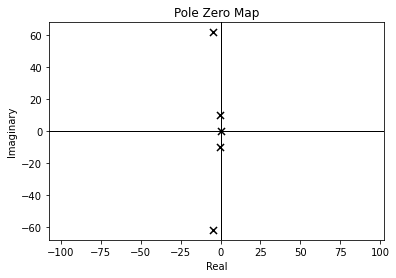

In [4]:
ctl.pzmap(P)

**P 1.3** Show Bode plot of the plant from **P1.1** with magnitude in dB and phase in degrees, in frequency range
0.01 - 1000 rad/s. What are the gain and phase margins of this plant? (2 point) 

**Note :** You must explicitly answer gain margin = ?, phase margin = ?. Don't just show an output from a function.
 
#### Solution

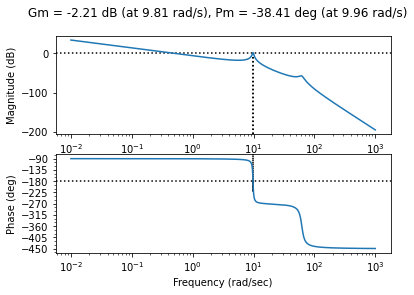

In [5]:
_,_,_ = ctl.bode_plot(P,dB=True, margins=True,omega_limits=(0.01,1000))

The Bode plot command evaluates gain margin = -2.21 dB and phase margin = -38.41 degrees.

**P1.4** From the feedback block diagram in Figure 3, use the plant from **P1.1** and a proportional control $C(s) = K = (x+y)$. Construct a transfer function mapping $d_i(s)$ to $y(s)$. If the closed-loop system is stable, find magnitude of $y(s)$ when $d_i(s) = sin(0.1t)$. Otherwise, simply state that the closed-loop system is unstable. 
(4 points)

<p align="center">
<img src="https://drive.google.com/uc?id=1CLNYYhbhGOpVaJULHdX13xoEv_AO2wyR" width=550 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 general block diagram of feedback system</b></div>

#### Solution

In [10]:
K = id_x+id_y
L_1 = K*P
T_1 = ctl.minreal(ctl.feedback(L_1))
ctl.pole(T_1)

0 states have been removed from the model


array([-4.85243425+61.93001176j, -4.85243425-61.93001176j,
        1.45283169+10.13135769j,  1.45283169-10.13135769j,
       -3.21593774 +0.j        ])

Since some of the poles of $T(s)$ lie on the right half complex plane, the closed-loop system is unstable. 
We can verify by simulating the response asked in the problem.

Observe that the closed-loop transfer function from $d_i(s)$ to $y(s)$ is $P(s)S(s)$.

0 states have been removed from the model


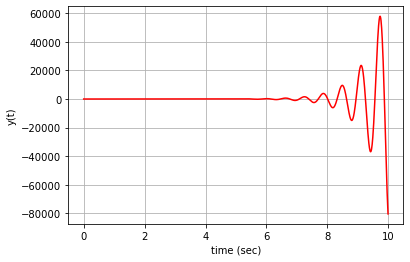

In [11]:
S_1 = 1/(1+L_1)
S_1 = ctl.minreal(S_1)
Sys = P*S_1
tvec = np.arange(0,10,0.01)
t,y = ctl.step_response(Sys,tvec)
plt.figure()
plt.plot(t,y,'r-')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.grid(True)
plt.show()


***
#### P2 (10 points)

Apply loopshaping control design for the HDM plant above with the following specifications 

1. zero steady-state tracking error

2. Output disturbance is attenuated as least $0.0y$ for frequency below $0.x$ rad/s

3. From the Bode plot, we observe 2 pairs of lightly-damped poles in high frequency region. Focus on the lower frequency pair. System bandwidth must be limited to at least 1 decade below the lightly-damped frequency mode. For instance, suppose that the lightly-damped mode frequency is 17 rad/s, the loop bandwidth (roughly the frequency where $|L(j\omega)|$ crosses the 0 dB line) must not exceed 1.7 rad/s. So, for this problem the high frequency criterion is not specified as noise attenuation, but instead a bandwidth limitation.

4. Closed-loop stable, with phase margin of at least 30 degrees.

**Remarks :**

* Lightly-damped mode frequency $\omega_d = \omega_n\sqrt{1-\zeta^2}$ can be found from the (absolute value of) imaginery part of the corresponding pair of lightly-damped poles.
* If you don't know how to specify high frequency criteria, just make the high frequency region starting from the lighly-damped mode frequency, and some small noise attenuation, say, -1 dB. The requirement here is bandwidth limitation. 

For your convenience, lshape() and plot_response() are provided in the following cell.

In [12]:
def lshape(C,P, lf, lfb, hf, hfb, pm ):
    assert lf > 0   # avoid bad values
    assert lfb > 0
    assert hf > lf
    assert hfb < 0
    assert 0 < pm < 90
    L = C*P # form loop transfer function
    # create a suitable range of frequency from lf, hf
    lf_log10 = np.log10(lf)
    w_start = np.floor(lf_log10)-1
    hf_log10 = np.log10(hf)
    w_end = np.ceil(hf_log10)+1
    w = np.logspace(w_start,w_end, 1000)
    
    # frequency response of L
    Lmag, Lph, om = ctl.freqresp(L, w)
    Lmag_db = np.squeeze(20*np.log10(Lmag))
    Lph_deg = np.squeeze(np.degrees(Lph))
    
    # create bound vectors
    lf_mask = np.where(om<lf, lfb, 0)
    hf_mask = np.where(om<hf, 0, hfb)
    lf_bnd = lf_mask*np.ones(om.shape)
    hf_bnd = hf_mask*np.ones(om.shape)
    
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfmag = Lmag_db[:lf_idx]
    hfmag = Lmag_db[hf_idx:]
    if min(lfmag)<lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
    
    # desired phase margin vectors
    pmvec = (pm-180)*np.ones(om.shape)
    
    # compute gain/phase margins
    g_margin, ph_margin, wgm, wpm = ctl.margin(L)
    ph_at_crossover = (ph_margin-180)
    # Loopshaping plot
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    fig.suptitle('$L(j\omega)$ v.s. bounds')
    ax1.semilogx(om, Lmag_db,'k-', om, lf_bnd, 'm-.', om, hf_bnd,'b-.')
    ax1.legend(["$|L(j\omega)|$",lf_legend,hf_legend],loc="lower left")
    ax1.grid(True)
    ax1.set_ylabel('magnitude (dB)')
    
    ax2.semilogx(om, Lph_deg,'k-',om, pmvec,'b-', wpm, ph_at_crossover,'r*')
    if ph_margin > pm:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees"
    else:
        pmtext = "phase margin = " + str(round(ph_margin)) + " degrees (violated)"
        
    ax2.text(wpm,ph_at_crossover,pmtext)
    
    dpmtext = "Desired PM (" + str(pm) + " degrees)"
    ax2.set_xlabel('frequency (rad/s)')
    ax2.set_ylabel('phase (deg)')
    ax2.legend(["$\measuredangle L(j\omega)$",dpmtext],loc="lower left")
    ax2.grid(True)    
    
    # plot magnitude of S and T v.s bounds
    S = 1/(1+L)
    T = L/(1+L)
    
    # frequency responses of S and T
    Smag, Sph, om = ctl.freqresp(S, w)
    Tmag, Tph, om = ctl.freqresp(T, w)
    
    Smag_db = np.squeeze(20*np.log10(Smag))
    Tmag_db = np.squeeze(20*np.log10(Tmag))
   
    # check whether violation occurs
    lf_idxv = np.where(om>lf)
    lf_idx = lf_idxv[0][0]   # find index of low-freq region
    hf_idxv = np.where(om<hf)
    hf_idx = hf_idxv[0][-1]  # find index of high-freq region
    lfSmag = Smag_db[:lf_idx]
    hfTmag = Tmag_db[hf_idx:]
    if max(lfSmag)>-lfb:
        lf_legend = "LF bound (violated)"
    else:
        lf_legend = "LF bound"
    if max(hfTmag)>hfb:
        hf_legend = "HF bound (violated)"
    else:
        hf_legend = "HF bound"    
        
    # create data vector for stability bound in mid freq region
    
    om_mid = om[lf_idx:hf_idx]
    pm_r = np.radians(pm)
    x = np.sin(0.5*(np.pi - pm_r))/(np.sin(pm_r)) 
    x = 20*np.log10(x)
    bnds_mid = x*np.ones(om_mid.shape)
    
    ST_peak = max(max(Smag_db),max(Tmag_db))
    if ST_peak > x:
        mf_legend = "Stability bound (violated)"
    else:
        mf_legend = "Stability bound"
    
    plt.figure(figsize=(8,4))
    plt.semilogx(om,Smag_db,'k-',om,Tmag_db,'g-',om,-lf_bnd,'m-.',om,hf_bnd,'b-.',om_mid,bnds_mid,'r-.')
    plt.xlabel('frequency (rad/s)')
    plt.ylabel('magnitude (dB)')
    plt.legend(["$|S(j\omega)|$","$|T(j\omega)|$",lf_legend,hf_legend, mf_legend])
    plt.grid(True)
    plt.title('$|S(j\omega)|$ and $|T(j\omega)|$ v.s. bounds')
    plt.show()


In [13]:
def plot_response(sys,u,t,title):
    tout, y = ctl.forced_response(sys,t, u)
    truncated_idx = 150  # get rid of transient
    tout = tout[truncated_idx:]
    u = u[truncated_idx:]
    y = y[truncated_idx:]
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
    fig.suptitle(title)
    ax1.plot(tout,u,'b-')
    ax1.grid(True)
    ax1.set_ylabel('input')
    
    ax2.plot(tout,y,'r-')
    ax2.grid(True)
    ax2.set_ylabel('output')
    ax2.set_xlabel('time (sec)')

    plt.show()    

#### Grade rubric

1. Obtain $C(s)$ and show that the Bode plot of $L(s)$ satisfies all criteria. Minor violations at frequeny boundaries may be tolerated. Bandwidth of $L(s)$ should not exceen the tolerance of 0.15 of the first lightly-damped frequency (5 points)
2. Show step response that verifies closed-loop stablity and zero steady-state tracking error. (3 points)
3. Disturbance response from $d_o(s)$ meets the specification, with tolerance of 5% exceeding the attenuation criteria. (2 points)

#### Solution

In [14]:
# From student ID x = 2, y=5, z = 8

S_bnd_abs = 0.01*id_y

# compute bounds
S_bnd = 20*np.log10(S_bnd_abs)
L_bnd = -S_bnd
print("Low frequency bound on S = " + str(S_bnd) + " dB")
print("Low frequency bound on L = " + str(L_bnd) + " dB")

Low frequency bound on S = -26.020599913279625 dB
Low frequency bound on L = 26.020599913279625 dB


Design criteria for this problem can be casted as

1. An integrator must be in $L(s)$. ($P(s)$ already has one, though we may want another one in $C(s)$ to achieve steeper $|L(j\omega)|$ in low-frequency region
2. In low frequency region below 0.2 rad/s, $|L(j\omega)|$ should lie below 26 dB
3. It can be observed from Bode-plot of  the plant that the lower-frequency lightly-damped mode happens around 
10 rad/s, so we choose hf=10 and hfb = -3 dB (for this problem just choose minimal attenuation for hfb)
4. Phase margin at least 30 degrees.

In [15]:
lf = 0.2
lfb = 26
hf = 10 
hfb = -3
pm = 30

In [16]:
C = 5*(s+0.75)/(s*(s+2.4))

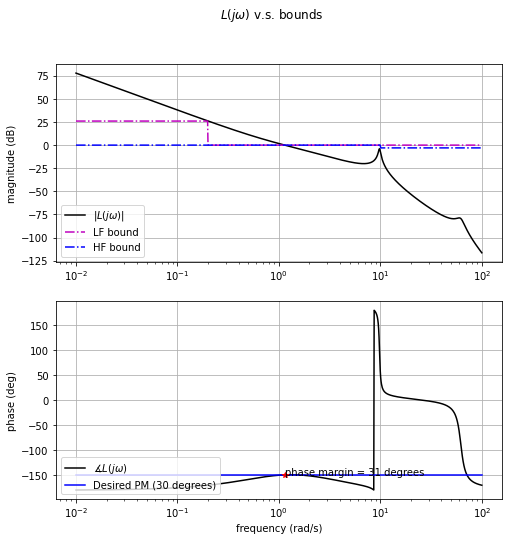

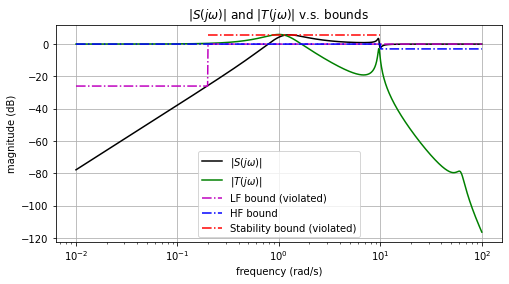

In [17]:
lshape(C,P, lf, lfb, hf, hfb,pm )

As can be seen from the loopshaping plots, a controller that meets the spec is 

$$
C(s) = \frac{5(s+0.75)}{s(s+2.4)}
$$

In order to check whether the bandwidth of $L(s)$ satisfies (3), we can use ctl.margin(). The bandwidth of $L(s)$ equals the frequency where phase margin is measured.

From the cell below, the bandwidth of $L(s)$ equals 1.14 rad/s, which are within the allowable value of 1.5 rad/s

In [18]:
L_2 = C*P
ctl.margin(L_2) # gm, pm, wgm, wpm

(6.778534780542077, 30.8196037850542, 8.66986118010613, 1.1413699895294493)

Plot a step response to verify that the feedback system yields zero steady-state error as desired.

0 states have been removed from the model


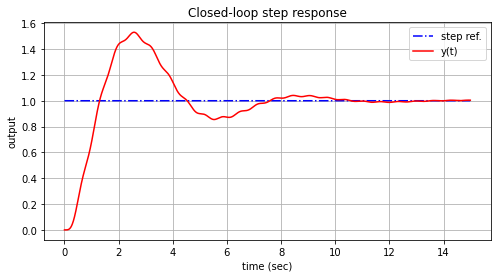

In [20]:
T_2 = ctl.minreal(ctl.feedback(L_2))
tvec = np.arange(0,15,0.01)
r = np.ones(tvec.shape)
tout, y_2 = ctl.step_response(T_2,tvec)
plt.figure(figsize=(8,4))
plt.plot(tout,r,'b-.',tout,y_2,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y(t)'])
plt.title('Closed-loop step response')
plt.show()

Verify that disturbance response for frequency below $0.x = 0.2$ rad/s is attenuated at least $0.0y = 0.05$

2 states have been removed from the model


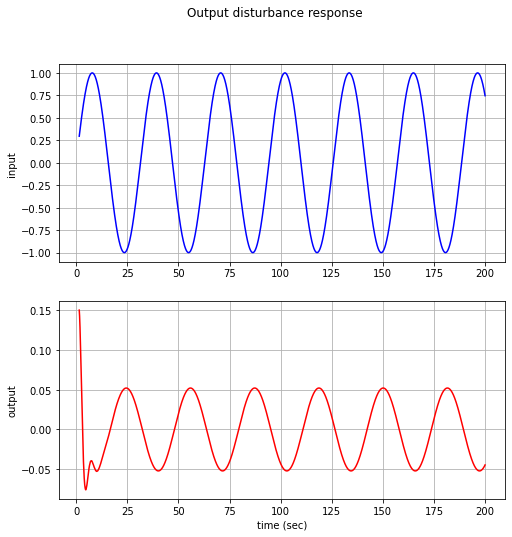

In [21]:
S_2 = ctl.minreal(1-T_2)
t = np.arange(0,200,0.01)  # adjust simulation time to see at least 1 cycle
w = 0.2  # rad/s. change this according to your problem
u = np.sin(w*t)
plot_response(S_2,u, t, 'Output disturbance response')